# Media Sentiment Analysis


*Notes : Project ini disusun untuk mengumpulkan analisis sentimen pada platform media online mengenai Prabowo-Gibran sebagai kandidat presiden dan wakil presiden dalam Pemilihan Umum Indonesia 2024*

*Prepared by* : **Achmad Dhani & Faris Arief Mawardi**

## I. Pendahuluan

**Latar Belakang:**

Project Analisis sentimen bertujuan untuk mengukur opini yang diekspresikan di platform media berita online terkait aliansi politik saat ini dari Prabowo Subianto dan Gibran Rakabuming Raka sebagai Calon Presiden dan Calon Wakil Presiden dalam kampanye Pemilihan Umum yang sedang berlangsung menuju pemilihan Presiden dan Wakil Presiden yang dijadwalkan pada Februari 2024.

### 5W1H Faktor Kunci:

**Siapa:**
- Prabowo Subianto dan Gibran Rakabuming Raka, Calon Presiden dan Calon Wakil Presiden Republik Indonesia.
- Platform media berita online yang melakukan publikasi berita terkait topik yang berhubungan dengan pencalonan Prabowo Subianto dan Gibran Rakabuming Raka sebagai Calon Presiden dan Calon Wakil Presiden Republik Indonesia.

**Apa:**
- Analisis sentimen berita online pada platform media yang membahas aliansi dan partisipasi aktif Prabowo dan Gibran dalam pemilihan Indonesia 2024.
- Pengumpulan media berita online untuk melakukan analisis sentimen lebih lanjut, dan pemahaman opini terkait aliansi politik dan pencalonan pasangan Prabowo Subianto dan Gibran Rakabuming Raka sebagai Calon Presiden dan Calon Wakil Presiden Republik Indonesia.

**Kapan:**
- Selama kampanye menuju pemilihan Indonesia 2024.
- Periode pengumpulan data adalah dari tanggal 15 November hingga 15 Desember 2023.

**Di mana:**
- Platform media berita online, khususnya berita yang ditulis dalam Bahasa Indonesia, yang membahas pencalonan pasangan Prabowo Subianto dan Gibran Rakabuming Raka sebagai Calon Presiden dan Calon Wakil Presiden Republik Indonesia.

**Mengapa:**
- Untuk memahami sentimen dan kecenderungan opini terhadap pencalonan Prabowo dan Gibran.
- Untuk memberikan wawasan tentang bagaimana penerimaan aliansi politik potensial ini di kalangan pemilih.

**Bagaimana:**
- Mengumpulkan berita online terkait #PrabowoGibran2024 dan melakukan analisis sentimen.
- Menggunakan teknik Pemrosesan Bahasa Alami (Natural Language Processing/NLP) untuk menganalisis sentimen tweet.
- Menggabungkan data, memproses, dan menginterpretasi skor sentimen untuk mendapatkan wawasan.

**Permasalahan:**

Menganalisis sentimen berita dari platform media online yang melingkupi aliansi Prabowo-Gibran dalam persiapan menuju pemilihan Indonesia 2024. Tujuannya adalah untuk memahami bagaimana sentimen dan opini publik mengenai pencalonan dan prospek politik secara keseluruhan saat mereka terlibat aktif dalam kampanye pemilihan yang sedang berlangsung menuju pemilihan presiden dan wakil presiden pada Februari 2024.

## II. Proses Scraping Berita Online

```python

def get_element_text(element, value, value_type="class"):
    item = element.find(attrs={value_type: value})
    return item.text if item else None

def get_data(parent_tag_, day_, month_):
    data = [{
    'Headline' : get_element_text(el,'n0jPhd ynAwRc MBeuO nDgy9d', 'class'),
    'Media' : get_element_text(el, 'MgUUmf NUnG9d', 'class'),
    'Date' : f"{day_}/{month_}/2023",
    'url': el.find("a", {"class":"WlydOe"})['href']
    } for el in parent_tag_]
    return data

scrape_data= []

def scraping(month, day):
    chrome_options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(options=chrome_options)

    url=f"https://www.google.com/search?q=prabowo+gibran&sca_esv=590380016&biw=1710&bih=953&sxsrf=AM9HkKl2jyc3pgk2OS3bmHnxuxjCN9ANBw%3A1702718802779&source=lnt&tbs=sbd%3A1%2Ccdr%3A1%2Ccd_min%3A{month}%2F{day}%2F2023%2Ccd_max%3A{month}%2F{day}%2F2023&tbm=nws"
    driver.get(url)
    sleep(2)
    html = driver.page_source 
    soup = bs(html, "html.parser")
    main_tag = soup.find_all("div", {"class": "SoaBEf"})
    first_data= get_data(main_tag, day, month)
    scrape_data.extend(first_data)
    link= soup.find('a', id="pnnext")['href']

    while True:
        driver.get('https://www.google.com' + link)
        sleep(2)
        html = driver.page_source
        soup = bs(html, "html.parser")
        loop_tag = soup.find_all("div", {"class": "SoaBEf"})
        next_data = get_data(loop_tag, day, month)
        scrape_data.extend(next_data)
        try:
            link= soup.find('a', id="pnnext")['href']
        except TypeError:
            break
    driver.quit()
```

Kode diatas digunakan untuk scraping/mengambil data berita dari Google Search dengan kata kunci pencarian **Prabowo Gibran**

----

## III. Visualisasi Sample

### 3.1 Teknis

#### 3.1.1 Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from matplotlib.dates import DateFormatter, AutoDateLocator

#### 3.1.2 Load Data

In [3]:
df = pd.read_csv('./media_analysis/hasil_akhir.csv', delimiter=';')

In [4]:
df['tanggal_publikasi'] = pd.to_datetime(df['tanggal_publikasi'], format='%d/%m/%Y')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   judul_berita       2121 non-null   object        
 1   portal_media       2121 non-null   object        
 2   tanggal_publikasi  2121 non-null   datetime64[ns]
 3   url                2121 non-null   object        
 4   hasil_sentimen     2121 non-null   object        
 5   olahan_teks        2121 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 99.6+ KB


---

### 3.2 Analisis Data

#### 3.2.1 Informasi Tentang Data

In [22]:
df.shape

(2121, 6)

Setelah proses scraping, terkumpul data sebanyak 2.121 berita online dari berbagai platform media online dalam periode 15 November hingga 15 Desember 2023. Selanjutnya, data akan dianalisis lebih lanjut.

In [79]:
df.select_dtypes(include='object').describe()

,judul_berita,portal_media,url,hasil_sentimen,olahan_teks
count,2121,2121,2121,2121,2121
unique,2113,527,2121,3,2102
top,Kementerian Komunikasi dan Informatika,detikNews,https://www.cnbcindonesia.com/news/20231115130...,netral,menteri komunikasi informatika
freq,3,92,1,1925,3


berdasarkan data deskriptif:
- terdapat beberapa berita dengan judul berita yang sama
- terdapat 527 portal media termasuk divisinya (contoh : Detiknews dan Detik.com)
- Setimen paling banyak adalah sentimen netral yang mencakup 1925 berita

In [140]:
pd.set_option('display.max_colwidth', None) 

In [142]:
df[df['hasil_sentimen'] == 'positif'][['judul_berita', 'hasil_sentimen']].sample(10)

,judul_berita,hasil_sentimen
2084,Terungkap! Gus Miftah Beberkan Alasan Prabowo Tak Mau Permalukan Anies saat \nDebat Capres Meski Diserang,positif
2000,"Mengaku Tak Punya Apa-apa, Prabowo Justru Paling Tajir di Antara \nCapres-Cawapres - Kompas.com",positif
1794,IJU Optimis Prabowo-Gibran Mampu Lanjutkan Program Jokowi,positif
441,Politik Gemoy ala Prabowo-Gibran,positif
873,"Dukungan Jokowi, SBY Hingga Luhut Perbesar Peluang ...",positif
237,Rekomendasi Film Animasi Terbaik Karya Studio Ghibli,positif
1088,"Miliki Basis Kuat, Prabowo-Gibran Dinilai Mampu Raup 60 Persen Suara Jabar",positif
1889,"Pemimpin Bijak dan Rendah Hati, Perolehan Elektabilitas Prabowo Dinilai \nAkan Tetap Tinggi",positif
1497,Relawan Pedagang Indonesia Maju Deklarasi Dukung ...,positif
1433,"Utamakan Rakyat, Prabowo dinilai Perhatian Terhadap Persoalan Akar Rumput",positif


In [143]:
df[df['hasil_sentimen'] == 'netral'][['judul_berita', 'hasil_sentimen']].sample(10)

,judul_berita,hasil_sentimen
1259,"Jokowi Resmikan Gereja Katedral di Kupang, Harap Bisa Pererat Persaudaraan \ndan Kerukunan",netral
1182,Prabowo-Gibran Berkomitmen Sediakan Rumah Murah untuk ...,netral
1390,AHY optimistis kemenangan Prabowo-Gibran di Pilpres 2024,netral
840,TPN: Ganjar-Mahfud punya concern terhadap kesejahteraan guru ngaji,netral
1818,Relawan Minta Prabowo-Gibran Terapkan Hari Cuti Ayah-Ibu Jika Menang,netral
771,Freddy Siap Menangkan Prabowo-Gibran dan Demokrat di ...,netral
20,"Gerindra Akui Sulit Menang di Jateng, Tapi... - Kompas.com",netral
2025,Program Makan Siang Prabowo-Gibran Dinanti Anak-anak di Timur Indonesia,netral
1949,"Kampanye Prabowo-Gibran di Sumsel 'Cancel', Begini Kata Ketua TPD KIM \nMawardi Yahya",netral
1570,Gus Miftah dan Bupati Kendal Kampanyekan Prabowo ...,netral


In [144]:
df[df['hasil_sentimen'] == 'negatif'][['judul_berita', 'hasil_sentimen']].sample(10)

,judul_berita,hasil_sentimen
1022,"Puji Prabowo dan Gibran Rakabuming, SBY Disebut Dokter Tifa Bak Telah \nDibodohi: Padahal Jendral Gemilang - Kilat",negatif
707,"Gibran Sering Absen Debat, Kapasitasnya Dipertanyakan",negatif
1327,"Soal Dugaan Pro ke Prabowo-Gibran, Polri ke Media: Jangan Diframing!",negatif
866,Trending! TKN Tanggapi Foto AI Gemoy Prabowo-Gibran Pakai Atribut LGBT: \nFitnah! - Radar Kudus,negatif
25,CEK FAKTA: Hoaks KPU Batalkan Gibran Jadi Cawapres ...,negatif
818,"Cawapres Gibran Rakabuming Dihujat dengan Kata-kata Kasar oleh Netizen di \nTwitter, Ada Apa? - Kilat",negatif
1000,"Dituding Buat Foto Prabowo-Gibran Pakai Pin dan Dasi LGBT, Ketua TKN: Itu \nHoax",negatif
1529,"Menggelikan! Roy Suryo Kian Sindir Lulusan Gibran Rakabuming, Bandingkan \nNama Universitas sang Cawapres dengan Brand Produk Pria Ini - Kilat",negatif
1964,"TKN Prabowo-Gibran Kritik Format Debat Capres, Kenapa?",negatif
736,"Arahan Prabowo-Gibran ke TKN dan TKD, Tak Boleh Jelek-jelekan Paslon Lain - \nKompas.com",negatif


- Terdapat berita-berita yang tidak relevan yang perlu di cleaning

### 3.3 Visualisasi 10 Portal Media Terbesar

In [80]:
top10media= df['portal_media'].value_counts().reset_index(name='jumlah_publikasi').head(10)

In [81]:
top10media

,portal_media,jumlah_publikasi
0,detikNews,92
1,Antaranews.com,90
2,KOMPAS.com,87
3,Politik,78
4,Liputan6.com,62
5,Nasional,57
6,detikcom,54
7,Tribun Jabar,47
8,CNN Indonesia,47
9,Merdeka.com,36


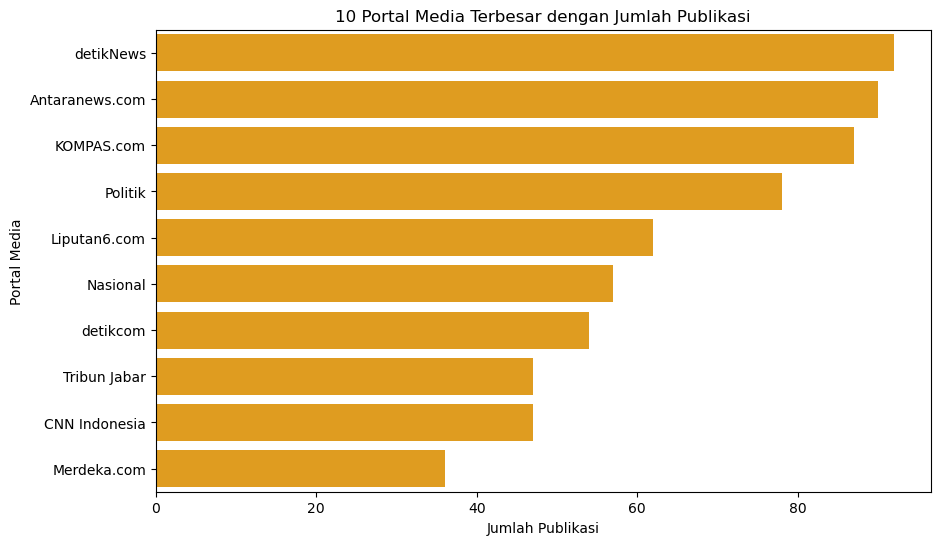

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(x='jumlah_publikasi', y='portal_media', data=top10media, color='orange')

plt.xlabel('Jumlah Publikasi')
plt.ylabel('Portal Media')
plt.title('10 Portal Media Terbesar dengan Jumlah Publikasi')
plt.show()

**Insight :**

1. **Volume Berita yang Signifikan:** Terkumpulnya 2.121 berita online menunjukkan volume yang cukup besar dalam rentang waktu satu bulan. Hal ini menandakan adanya kegiatan yang signifikan dalam pemberitaan di berbagai platform media online selama periode waktu tersebut.

2. **Keragaman Sumber Berita:** Pengumpulan data dari berbagai platform media online menunjukkan bahwa informasi dan liputan tidak hanya berasal dari satu sumber, tetapi mencakup berbagai platform media. Hal ini mengindikasikan variasi dan sumber informasi yang luas yang dapat mempengaruhi keberagaman perspektif dalam analisis lebih lanjut.

3. **Signifikansi Publikasi Berita Beberapa Platform Media :** Dari data yang terlampir, ditemukan adanya beberapa platform media yang memiliki jumlah publikasi lebih banyak dibandingkan dengan platform media lainnya, yaitu detikNews (92 Publikasi), Antaranews.com (90 Publikasi), Kompas.com (87 Publikasi), dan Politik (78 Publikasi)

4. **Kesempatan Analisis Mendalam:** Dengan terkumpulnya jumlah berita yang signifikan, terbuka peluang untuk melakukan analisis lebih mendalam terkait tren berita, topik yang paling banyak dibahas, sentimen yang dominan, serta aspek penting lainnya yang terkait dengan periode waktu tersebut. Analisis lebih lanjut akan membantu dalam memahami isu-isu yang mendapat perhatian serta peristiwa yang paling memengaruhi cakupan berita dalam periode yang ditentukan.

### Visualisasi Sentimen

In [85]:
total_sentimen= df['hasil_sentimen'].value_counts().reset_index(name='jumlah_berita')

In [86]:
total_sentimen

,hasil_sentimen,jumlah_berita
0,netral,1925
1,negatif,135
2,positif,61


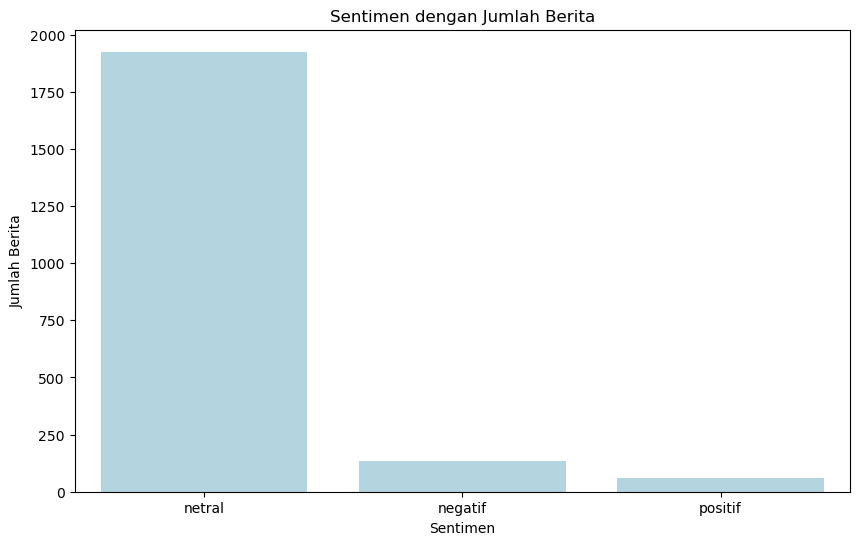

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hasil_sentimen', y='jumlah_berita', data=total_sentimen, color='lightblue')

plt.xlabel('Sentimen')
plt.ylabel('Jumlah Berita')
plt.title('Sentimen dengan Jumlah Berita')
plt.show()

**insights :**

Visualisasi ini membantu mendapatkan informasi mengenai jumlah sentimen dari seluruh jumlah berita. Dari data sampel didapatkan berita paling banyak merupakan sentimen netral.

1. **Sentimen Dominan**: Sentimen 'Netral' tampaknya menjadi yang paling sering muncul di antara sentimen yang terwakili dalam dataset, dengan 1.925 berita. Hal ini menunjukkan bahwa sebagian besar berita yang menyinggung topik pencalonan Prabowo dan Gibran sebagai Presiden dan Wakil Presiden Republik Indonesia memiliki sentimen yang netral.

2. **Sentimen Negatif**: Sentimen 'Negatif' memiliki persebaran berita terbanyak kedua dengan 135 berita. Ini mengindikasikan sekelompok berita dengan sentimen negatif yang berjumlah kurang signifikan dalam dataset dan mungkin menggarisbawahi masalah khusus atau kritik.

3. **Sentimen Positif**: Berita dengan sentimen 'Positif' tampaknya merupakan kelompok berita yang paling jarang muncul di antara ketiga sentimen tersebut, dengan 61 publikasi berita. Adanya sekelompok berita bersentimen positif menunjukkan adanya berita dengan pandangan atau ekspresi positif terkait topik pencalonan Prabowo dan Gibran sebagai Presiden dan Wakil Presiden Republik Indonesia dalam dataset.

4. **Keseimbangan vs. Kecenderungan Sentimen**: Keberadaan jumlah yang lebih besar dari sentimen 'Netral' mungkin menunjukkan perspektif yang lebih seimbang atau objektif terkait berita yang terdapat di platform media online, sementara kemunculan sentimen 'Negatif' mungkin menunjukkan adanya aspek yang kontroversial atau kritis dalam dataset. Sentimen 'Positif', meskipun jumlahnya lebih sedikit, masih memberikan kontribusi yang cukup besar untuk mewakili adanya ekspresi atau opini positif terkait topik yang ditelusuri.

### Visualisasi Media degan Publikasi Sentimen Positif

In [121]:
media_positif= df[df['hasil_sentimen'] == 'positif']['portal_media'].value_counts().head(3).reset_index(name='jumlah_berita')
media_positif

,portal_media,jumlah_berita
0,Tribun Jabar,8
1,Tribunnews.com,3
2,RILIS ID,2


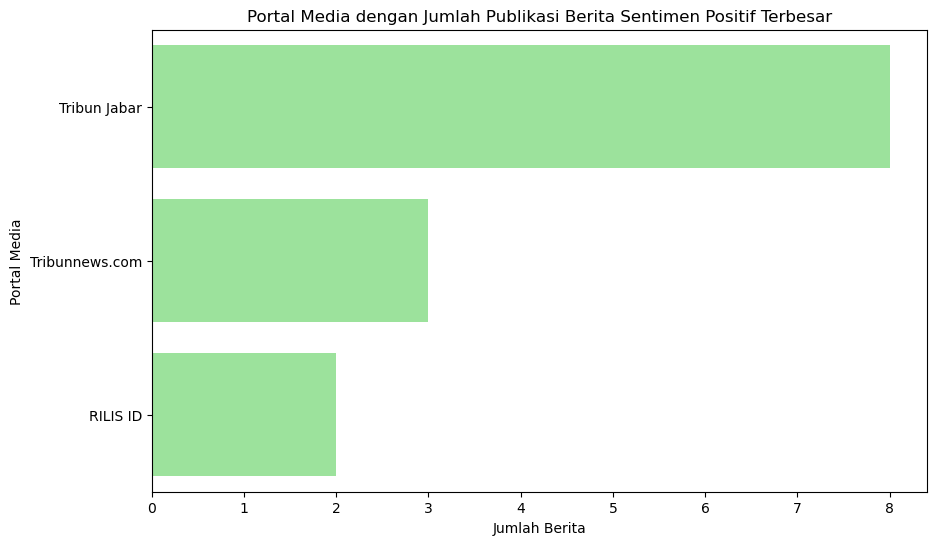

In [146]:
plt.figure(figsize=(10, 6))
sns.barplot(x='jumlah_berita', y='portal_media', data=media_positif, color='lightgreen')
plt.xlabel('Jumlah Berita')
plt.ylabel('Portal Media')
plt.title('Portal Media dengan Jumlah Publikasi Berita Sentimen Positif Terbesar')
plt.show()

**Insights :**

Berdasarkan data di atas, didapatkan bahwa 3 portal media yang memiliki jumlah publikasi berita bersentimen positif terbanyak adalah :
1. Tribun Jabar (8)
2. Tribunnews.com (3)
3. Rilis ID (2)

### Visualisasi Media degan Publikasi Sentimen Netral

In [128]:
media_netral= df[df['hasil_sentimen'] == 'netral']['portal_media'].value_counts().head(3).reset_index(name='jumlah_berita')
media_netral

,portal_media,jumlah_berita
0,Antaranews.com,88
1,detikNews,87
2,KOMPAS.com,83


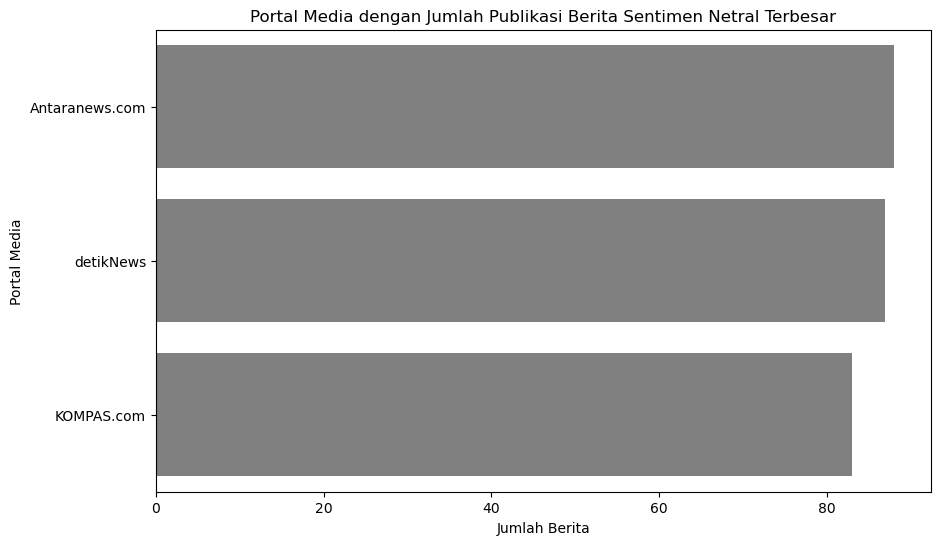

In [145]:
plt.figure(figsize=(10, 6))
sns.barplot(x='jumlah_berita', y='portal_media', data=media_netral, color='grey')
plt.xlabel('Jumlah Berita')
plt.ylabel('Portal Media')
plt.title('Portal Media dengan Jumlah Publikasi Berita Sentimen Netral Terbesar')
plt.show()

**Insights :**

Setelah ditelusuri secara spesifik, portal media dengan publikasi berita dengan sentimen netral paling banyak adalah:
1. Antaranews.com (88 Publikasi)
2. detikNews (87 Publikasi)
3. KOMPAS.com (83 Publikasi)

### Visualisasi Media degan Publikasi Sentimen Negatif

In [133]:
media_negatif= df[df['hasil_sentimen'] == 'negatif']['portal_media'].value_counts().head(3).reset_index(name='jumlah_berita')
media_negatif

,portal_media,jumlah_berita
0,Kilat,10
1,JPNN.com,5
2,KOMPAS.tv,5


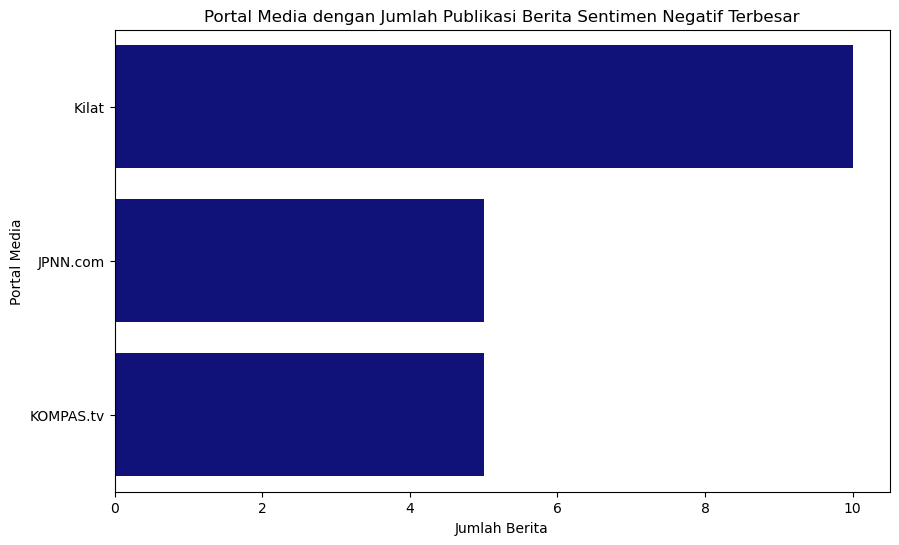

In [147]:
plt.figure(figsize=(10, 6))
sns.barplot(x='jumlah_berita', y='portal_media', data=media_negatif, color='darkblue')
plt.xlabel('Jumlah Berita')
plt.ylabel('Portal Media')
plt.title('Portal Media dengan Jumlah Publikasi Berita Sentimen Negatif Terbesar')
plt.show()

**Insights :**

Setelah ditelusuri, portal media dengan publikasi berita dengan sentimen negatif paling banyak adalah:
1. Kilat (10 Publikasi)
2. JPNN.com (5 Publikasi)
3. KOMPAS.tv (5 Publikasi)

### Visualisasi Jumlah Berita berdasarkan Tanggal

In [89]:
berita_tanggal= df.groupby('tanggal_publikasi')['judul_berita'].count().reset_index(name='jumlah_publikasi')

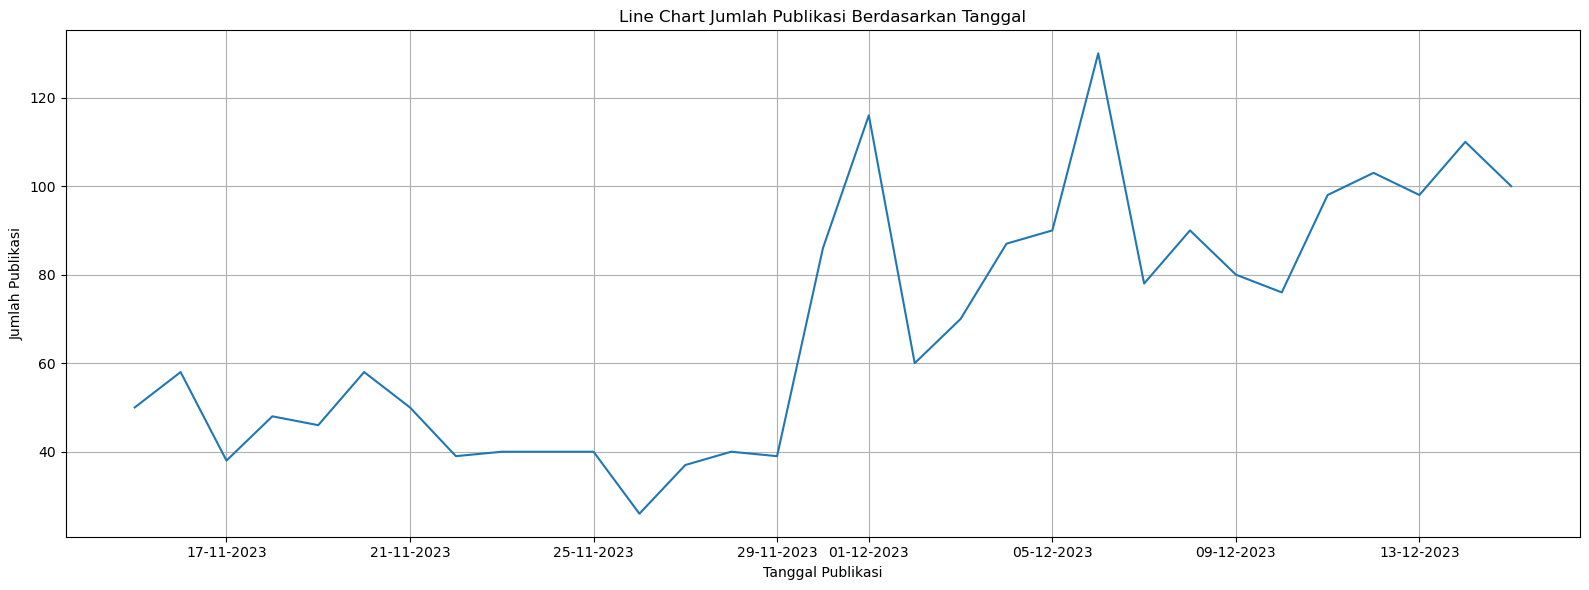

In [90]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='tanggal_publikasi', y='jumlah_publikasi', data=berita_tanggal, )

date_format = DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel('Tanggal Publikasi')
plt.ylabel('Jumlah Publikasi')
plt.title('Line Chart Jumlah Publikasi Berdasarkan Tanggal')
plt.grid(True)
plt.tight_layout() 
plt.show()

**Insights :**

Dari data yang diberikan, terdapat informasi jumlah publikasi berita per hari dalam rentang waktu yang telah disesuaikan. Berikut beberapa insight yang dapat diperoleh dari data tersebut:

1. **Tren Jumlah Berita**: Terlihat fluktuasi jumlah publikasi berita harian yang cukup signifikan dari tanggal 15 November 2023 hingga 15 Desember 2023. Ada variasi jumlah publikasi berita yang signifikan pada hari-hari tertentu.

2. **Peningkatan Jumlah Publikasi yang Signifikan**: Terdapat peningkatan yang cukup besar dalam publikasi berita pada beberapa hari, seperti pada tanggal 30 November, 1 Desember, dan 6 Desember. Hal ini mungkin menunjukkan adanya peristiwa yang dapat menarik perhatian pada hari-hari tersebut, seperti diselanggarakannya kampanye ataupun hal lainnya.

3. **Penurunan Jumlah Publikasi**: Pada beberapa hari tertentu, terutama di tanggal 2 dan 7 Desember 2023, jumlah publikasi berita terkait topik Prabowo dan Gibran cenderung menurun. Ini bisa disebabkan oleh berkurangnya peristiwa atau topik menarik yang membuat publikasi berita menurun.

4. **Tren Jangka Panjang**: Secara keseluruhan, terdapat tren peningkatan jumlah publikasi berita seiring berjalannya waktu, yang dimulai pada pertengahan dan akhir periode pengamatan (dari akhir November hingga pertengahan Desember). 

### Visualisasi WordCloud

In [6]:
# using counter to count the number of words
words = [word for text in df['olahan_teks'] for word in text.split()]

word_freq = Counter(words) # count of each word

In [7]:
print(word_freq)

Counter({'prabowo': 1665, 'gibran': 1608, 'menang': 300, 'tkn': 285, 'dukung': 280, 'kampanye': 174, 'ganjar': 158, 'com': 134, 'pilpres': 129, 'jokowi': 122, 'tkd': 122, 'capres': 117, 'rawan': 114, 'debat': 113, 'kompas': 108, 'anies': 104, 'mahfud': 99, 'cawapres': 92, 'indonesia': 89, 'suara': 88, 'ketua': 85, 'survei': 83, 'pilih': 81, 'tim': 80, 'deklarasi': 75, 'putar': 71, 'target': 62, 'muda': 59, 'program': 58, 'politik': 53, 'rakabuming': 52, 'hadir': 51, 'jabar': 50, 'jatim': 48, 'gerindra': 47, 'pasang': 45, 'elektabilitas': 44, 'partai': 42, 'radar': 42, 'gelar': 41, 'nilai': 40, 'amin': 39, 'subianto': 39, 'maju': 38, 'gratis': 38, 'janji': 37, 'cak': 37, 'pdip': 36, 'kader': 36, 'bicara': 35, 'gemoy': 35, 'masyarakat': 35, 'susu': 34, 'kota': 34, 'alas': 34, 'hasil': 33, 'jakarta': 32, 'milenial': 32, 'golkar': 32, 'kuat': 31, 'bawaslu': 31, 'pimpin': 31, 'milu': 31, 'unggul': 30, 'ajak': 30, 'kilat': 30, 'kpu': 29, 'jateng': 26, 'banten': 26, 'desa': 26, 'perdana': 26,

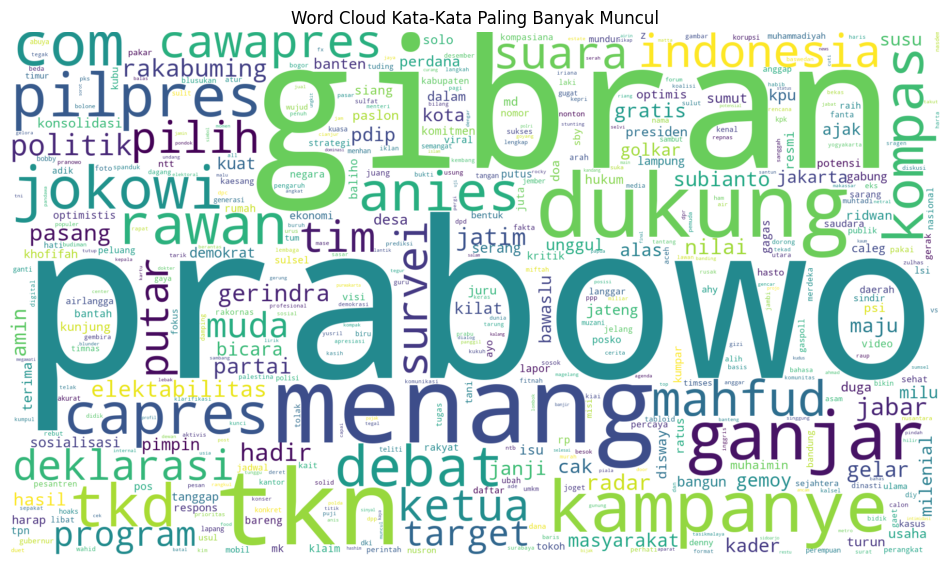

In [8]:
kata_wordcloud = WordCloud(width=1920, height=1080,
                      max_words= 500,
                      background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))

# Display the word cloud
plt.imshow(kata_wordcloud, interpolation='bilinear')
plt.title('Word Cloud Kata-Kata Paling Banyak Muncul')
plt.axis('off')

plt.show()

In [11]:
most_common = word_freq.most_common(20)  # Unveiling the top 10 most frequently used phrases

# Unveiling the most frequently used phrases
print("Kata dengan frekuensi kemunculan tertinggi:")
print(most_common)

# Calculating the least frequently used phrases
least_common = word_freq.most_common()[:-21:-1]  # Unveiling the 10 least used phrases

# Unveiling the least frequently used hashtags
print("Kata dengan frekuensi kemunculan terendah:")
print(least_common)

Kata dengan frekuensi kemunculan tertinggi:
[('prabowo', 1665), ('gibran', 1608), ('menang', 300), ('tkn', 285), ('dukung', 280), ('kampanye', 174), ('ganjar', 158), ('com', 134), ('pilpres', 129), ('jokowi', 122), ('tkd', 122), ('capres', 117), ('rawan', 114), ('debat', 113), ('kompas', 108), ('anies', 104), ('mahfud', 99), ('cawapres', 92), ('indonesia', 89), ('suara', 88)]
Kata dengan frekuensi kemunculan terendah:
[('java', 1), ('outside', 1), ('first', 1), ('slated', 1), ('digitalisasi', 1), ('ngobrol', 1), ('meja', 1), ('gebrak', 1), ('omong', 1), ('samosir', 1), ('nainggolan', 1), ('reply', 1), ('pencapresan', 1), ('risiko', 1), ('raib', 1), ('ngopi', 1), ('rompas', 1), ('andy', 1), ('makasiouw', 1), ('mangun', 1)]


**Insights :**

1. **Topik Utama yang Dibahas:** Frasa-frasa seperti 'prabowo', 'gibran', 'dukung', 'kampanye', 'ganjar', 'pilpres', 'jokowi', dan 'anies' merupakan topik yang paling sering muncul dalam pemberitaan terkait Prabowon dan Gibran. Hal ini menandakan bahwa pembicaraan terpusat pada kedua kandidat, dukungan terhadap mereka, kompetitor, pendahulu dalam jabatan kepresidenan, dan isu kampanye yang berkaitan. 

2. **Kontroversi dan Pemantauan Terkait:** Beberapa frasa seperti 'rawan', 'debat', 'mahfud', dan 'cawapres' muncul dalam frekuensi yang cukup tinggi. Ini menunjukkan bahwa kontroversi, persiapan debat, dan isu terkait calon wakil presiden (cawapres) menjadi perhatian penting dalam pemberitaan.

3. **Media dan Sumber Berita:** Kemunculan frasa 'kompas' menandakan adanya keterkaitan dengan pemberitaan dari media tertentu. Hal ini mengindikasikan bahwa sumber berita atau artikel dari Kompas mungkin memainkan peran penting dalam pemberitaan atau pembahasan terkait topik ini di portal media online.

4. **Diversitas Isu:** Meskipun topik utama yang sering muncul adalah terkait dengan Prabowo-Gibran dan isu-isu kampanye, tetapi juga ada sejumlah kata dan frasa yang kurang umum muncul. Misalnya, 'digitalisasi', 'risiko', 'ngobrol', 'raib', dan 'reply'. Ini bisa menunjukkan variasi isu atau diskusi yang kurang populer, tetapi mungkin memiliki relevansi dan menarik untuk dianalisis lebih lanjut.

5. **Keterlibatan dan Dukungan:** Frasa 'menang', 'tkn', 'tkd', 'suara', 'capres', dan 'indonesia' menunjukkan bahwa ada perbincangan terkait dukungan, strategi kampanye, dan peta suara yang menjadi fokus pembicaraan di berita pada portal media online.

Data ini memberikan gambaran umum tentang fokus pembicaraan, isu-isu utama yang dibahas, serta variasi topik yang muncul dalam pemberitaan di portal media online terkait Prabowo dan Gibran.

---

# Penemuan Data

- Terdapat judul berita yang duplikat
    - perlu di cek dengan mengunjungi URLnya
- Terdapat divisi media yang perlu disatukan dengan induk portalnya

----

# Tantangan

- Struktur HTML dapat berubah setiap kata kunci yang digunakan dalam Google Search sehingga perlu di optimasi kode scraping untuk setiap kata kunci
- Kode belum paling efisien karena setiap ganti hari ketika scraping perlu menutup dan membuka kembali browser
- Pengolahan teks membutuhkan waktu jika diperlukan
- Pembersihan data berita yang tidak relevan

---

# Kesimpulan

1. **Dominasi Sentimen Netral pada Pemberitaan Mengenai Prabowo dan Gibran :** Sentimen 'Netral' menjadi yang paling sering muncul di antara sentimen yang terwakili dalam dataset, dengan 1.925 pulikasi berita. Hal ini menunjukkan bahwa sebagian besar berita yang menyinggung topik pencalonan Prabowo dan Gibran sebagai Presiden dan Wakil Presiden Republik Indonesia memiliki sentimen yang netral. 

2. **Signifikansi Publikasi Berita Beberapa Platform Media :** Terdapat beberapa portal media yang memiliki jumlah publikasi lebih banyak dibandingkan dengan portal media lainnya, yaitu detikNews (92 Publikasi), Antaranews.com (90 Publikasi), Kompas.com (87 Publikasi), dan Politik (78 Publikasi)

3. Adapun beberapa portal yang memiliki jumlah publikasi tertinggi berdasarkan sentimen beritanya adalah sebagai berikut :
    
    - **Sentimen Positif**
        - Tribun Jabar (8 Publikasi)
        - Tribunnews.com (3 Publikasi)
        - Rilis ID (2 Publikasi)
    - **Sentimen Netral**
        - Antaranews.com (88 Publikasi)
        - detikNews (87 Publikasi)
        - KOMPAS.com (83 Publikasi)
    - **Sentimen Negatif**
        - Kilat (10 Publikasi)
        - JPNN.com (5 Publikasi)
        - KOMPAS.tv (5 Publikasi)

4. **Kata-Kata dengan Frekuensi Kemunculan Tertinggi:** Frasa-frasa seperti 'prabowo', 'gibran', 'dukung', 'kampanye', 'ganjar', 'pilpres', 'jokowi', dan 'anies' merupakan topik yang paling sering muncul dalam pemberitaan terkait Prabowo dan Gibran. Hal ini menandakan bahwa pembicaraan terpusat pada kedua kandidat, dukungan terhadap mereka, kompetitor, pendahulu dalam jabatan kepresidenan, dan isu kampanye yang berkaitan. 